In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
sc = spark.sparkContext

In [0]:
%fs ls dbfs:/databricks-datasets/online_retail/data-001/

path,name,size,modificationTime
dbfs:/databricks-datasets/online_retail/data-001/data.csv,data.csv,5357240,1466107812000



## Read the dataset

In [0]:
retail_data = sc.textFile("dbfs:/databricks-datasets/online_retail/data-001/data.csv")

In [0]:
retail_data.take(10)

Out[145]: ['InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country',
 '536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850,United Kingdom',
 '536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850,United Kingdom',
 '536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850,United Kingdom',
 '536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850,United Kingdom',
 '536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850,United Kingdom',
 '536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/10 8:26,7.65,17850,United Kingdom',
 '536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/10 8:26,4.25,17850,United Kingdom',
 '536366,22633,HAND WARMER UNION JACK,6,12/1/10 8:28,1.85,17850,United Kingdom',
 '536366,22632,HAND WARMER RED POLKA DOT,6,12/1/10 8:28,1.85,17850,United Kingdom']


## Parsing the records

In [0]:
def parseLine(line):
    rec = line.split(',')

    try:
        return (rec[6], 
                rec[0], 
                rec[4].split()[0], 
                round(float(rec[3]) * float(rec[5]), 2))
    except:
        return None

In [0]:
cust_data = retail_data.map(lambda line: parseLine(line))

In [0]:
cust_data.take(20)

Out[148]: [None,
 ('17850', '536365', '12/1/10', 15.3),
 ('17850', '536365', '12/1/10', 20.34),
 ('17850', '536365', '12/1/10', 22.0),
 ('17850', '536365', '12/1/10', 20.34),
 ('17850', '536365', '12/1/10', 20.34),
 ('17850', '536365', '12/1/10', 15.3),
 ('17850', '536365', '12/1/10', 25.5),
 ('17850', '536366', '12/1/10', 11.1),
 ('17850', '536366', '12/1/10', 11.1),
 ('13047', '536367', '12/1/10', 54.08),
 ('13047', '536367', '12/1/10', 12.6),
 ('13047', '536367', '12/1/10', 12.6),
 ('13047', '536367', '12/1/10', 30.0),
 ('13047', '536367', '12/1/10', 9.9),
 ('13047', '536367', '12/1/10', 25.5),
 ('13047', '536367', '12/1/10', 14.85),
 ('13047', '536367', '12/1/10', 19.9),
 ('13047', '536367', '12/1/10', 17.85),
 ('13047', '536367', '12/1/10', 17.85)]


## Filetering the null values

In [0]:
cust_data = cust_data.filter(lambda x: x != None)

In [0]:
cust_data.take(20)

Out[150]: [('17850', '536365', '12/1/10', 15.3),
 ('17850', '536365', '12/1/10', 20.34),
 ('17850', '536365', '12/1/10', 22.0),
 ('17850', '536365', '12/1/10', 20.34),
 ('17850', '536365', '12/1/10', 20.34),
 ('17850', '536365', '12/1/10', 15.3),
 ('17850', '536365', '12/1/10', 25.5),
 ('17850', '536366', '12/1/10', 11.1),
 ('17850', '536366', '12/1/10', 11.1),
 ('13047', '536367', '12/1/10', 54.08),
 ('13047', '536367', '12/1/10', 12.6),
 ('13047', '536367', '12/1/10', 12.6),
 ('13047', '536367', '12/1/10', 30.0),
 ('13047', '536367', '12/1/10', 9.9),
 ('13047', '536367', '12/1/10', 25.5),
 ('13047', '536367', '12/1/10', 14.85),
 ('13047', '536367', '12/1/10', 19.9),
 ('13047', '536367', '12/1/10', 17.85),
 ('13047', '536367', '12/1/10', 17.85),
 ('13047', '536367', '12/1/10', 31.8)]


## Calculating Invoice Amount

In [0]:
cust_txn_data = cust_data.map(lambda rec: ((rec[0], 
                                            rec[1], 
                                            rec[2]), 
                                            rec[3])).reduceByKey(lambda x, y: x + y)

In [0]:
cust_txn_data.take(20)

Out[152]: [(('13047', '536367', '12/1/10'), 278.73),
 (('13047', '536368', '12/1/10'), 70.05),
 (('12583', '536370', '12/1/10'), 855.86),
 (('13748', '536371', '12/1/10'), 204.0),
 (('17850', '536372', '12/1/10'), 22.2),
 (('15100', '536374', '12/1/10'), 350.4),
 (('17850', '536375', '12/1/10'), 259.86),
 (('15291', '536376', '12/1/10'), 328.79999999999995),
 (('17850', '536377', '12/1/10'), 22.2),
 (('17809', '536380', '12/1/10'), 34.8),
 (('15311', '536381', '12/1/10'), 445.78),
 (('16250', '536388', '12/1/10'), 226.14000000000001),
 (('17511', '536390', '12/1/10'), 1825.74),
 (('13408', '536394', '12/1/10'), 1014.6),
 (('17850', '536396', '12/1/10'), 376.36000000000007),
 (('13448', '536400', '12/1/10'), 17.4),
 (('15862', '536401', '12/1/10'), 354.2299999999999),
 (('15513', '536402', '12/1/10'), 357.0),
 (('12791', '536403', '12/1/10'), 192.6),
 (('16218', '536404', '12/1/10'), 471.29999999999995)]


## Filtering out negative invoice amounts

This could be because of refunds. But we will ignore these records for this analysis.

In [0]:
cust_txn_data = cust_txn_data.filter(lambda rec: rec[1] > 0.0)

In [0]:
cust_txn_data.take(20)

Out[154]: [(('13047', '536367', '12/1/10'), 278.73),
 (('13047', '536368', '12/1/10'), 70.05),
 (('12583', '536370', '12/1/10'), 855.86),
 (('13748', '536371', '12/1/10'), 204.0),
 (('17850', '536372', '12/1/10'), 22.2),
 (('15100', '536374', '12/1/10'), 350.4),
 (('17850', '536375', '12/1/10'), 259.86),
 (('15291', '536376', '12/1/10'), 328.79999999999995),
 (('17850', '536377', '12/1/10'), 22.2),
 (('17809', '536380', '12/1/10'), 34.8),
 (('15311', '536381', '12/1/10'), 445.78),
 (('16250', '536388', '12/1/10'), 226.14000000000001),
 (('17511', '536390', '12/1/10'), 1825.74),
 (('13408', '536394', '12/1/10'), 1014.6),
 (('17850', '536396', '12/1/10'), 376.36000000000007),
 (('13448', '536400', '12/1/10'), 17.4),
 (('15862', '536401', '12/1/10'), 354.2299999999999),
 (('15513', '536402', '12/1/10'), 357.0),
 (('12791', '536403', '12/1/10'), 192.6),
 (('16218', '536404', '12/1/10'), 471.29999999999995)]


## Dealing with Date and Timestamps

In [0]:
from datetime import datetime

In [0]:
def parse_tuple(fields):
    customer_id = fields[0][0]
    timestamp = datetime.strptime(fields[0][2], "%m/%d/%y")  # Adjust the timestamp format as needed
    amount = float(fields[1])
    return (customer_id, (amount, timestamp))

In [0]:
cust_txn_data_final = cust_txn_data.map(parse_tuple)

In [0]:
cust_txn_data_final.take(20)

Out[158]: [('13047', (278.73, datetime.datetime(2010, 12, 1, 0, 0))),
 ('13047', (70.05, datetime.datetime(2010, 12, 1, 0, 0))),
 ('12583', (855.86, datetime.datetime(2010, 12, 1, 0, 0))),
 ('13748', (204.0, datetime.datetime(2010, 12, 1, 0, 0))),
 ('17850', (22.2, datetime.datetime(2010, 12, 1, 0, 0))),
 ('15100', (350.4, datetime.datetime(2010, 12, 1, 0, 0))),
 ('17850', (259.86, datetime.datetime(2010, 12, 1, 0, 0))),
 ('15291', (328.79999999999995, datetime.datetime(2010, 12, 1, 0, 0))),
 ('17850', (22.2, datetime.datetime(2010, 12, 1, 0, 0))),
 ('17809', (34.8, datetime.datetime(2010, 12, 1, 0, 0))),
 ('15311', (445.78, datetime.datetime(2010, 12, 1, 0, 0))),
 ('16250', (226.14000000000001, datetime.datetime(2010, 12, 1, 0, 0))),
 ('17511', (1825.74, datetime.datetime(2010, 12, 1, 0, 0))),
 ('13408', (1014.6, datetime.datetime(2010, 12, 1, 0, 0))),
 ('17850', (376.36000000000007, datetime.datetime(2010, 12, 1, 0, 0))),
 ('13448', (17.4, datetime.datetime(2010, 12, 1, 0, 0))),
 ('1


## Finding the reference date for calculating recency

In [0]:
cust_txn_data_final.map(lambda rec: rec[1][1]).reduce(max)

Out[159]: datetime.datetime(2011, 1, 20, 0, 0)

In [0]:
cust_txn_data_final.map(lambda rec: rec[1][1]).reduce(min)

Out[160]: datetime.datetime(2010, 12, 1, 0, 0)

In [0]:
reference_date = datetime.strptime("1/31/11", "%m/%d/%y")
reference_date_var = sc.broadcast(reference_date)


## Finding how many days before the purchase was made?

In [0]:
cust_txn_data_final = cust_txn_data_final.map(lambda rec: (rec[0], 
                                                          (rec[1][0], 
                                                          (reference_date_var.value - rec[1][1]).days)))

In [0]:
cust_txn_data_final.take(20)

Out[163]: [('13047', (278.73, 61)),
 ('13047', (70.05, 61)),
 ('12583', (855.86, 61)),
 ('13748', (204.0, 61)),
 ('17850', (22.2, 61)),
 ('15100', (350.4, 61)),
 ('17850', (259.86, 61)),
 ('15291', (328.79999999999995, 61)),
 ('17850', (22.2, 61)),
 ('17809', (34.8, 61)),
 ('15311', (445.78, 61)),
 ('16250', (226.14000000000001, 61)),
 ('17511', (1825.74, 61)),
 ('13408', (1014.6, 61)),
 ('17850', (376.36000000000007, 61)),
 ('13448', (17.4, 61)),
 ('15862', (354.2299999999999, 61)),
 ('15513', (357.0, 61)),
 ('12791', (192.6, 61)),
 ('16218', (471.29999999999995, 61))]


## Finding Frequency

In [0]:
cust_frequency = cust_txn_data_final.map(lambda rec: (rec[0], 1)).reduceByKey(lambda x, y: x + y)

In [0]:
cust_frequency.take(20)

Out[165]: [('13047', 3),
 ('12583', 2),
 ('13748', 1),
 ('15311', 16),
 ('16250', 1),
 ('13408', 6),
 ('13448', 3),
 ('15513', 4),
 ('17908', 1),
 ('12838', 1),
 ('18085', 2),
 ('13758', 3),
 ('17897', 2),
 ('17377', 3),
 ('16552', 1),
 ('12868', 2),
 ('15525', 1),
 ('15485', 2),
 ('16955', 3),
 ('15350', 1)]


## Finding Total Monetary value

In [0]:
cust_monetary = cust_txn_data_final.map(lambda rec: (rec[0], rec[1][0])).reduceByKey(lambda x, y: x + y)

In [0]:
cust_monetary.take(20)

Out[167]: [('13047', 366.63000000000005),
 ('12583', 1586.0200000000002),
 ('13748', 204.0),
 ('15311', 6116.7),
 ('16250', 226.14000000000001),
 ('13408', 3325.3199999999997),
 ('13448', 829.54),
 ('15513', 2064.8199999999997),
 ('17908', 243.2799999999999),
 ('12838', 390.78999999999985),
 ('18085', 689.9499999999999),
 ('13758', 1141.25),
 ('17897', 434.61999999999995),
 ('17377', 785.0800000000002),
 ('16552', 95.29),
 ('12868', 485.71999999999997),
 ('15525', 313.9299999999999),
 ('15485', 1248.3899999999999),
 ('16955', 354.98),
 ('15350', 115.64999999999999)]


## Finding recency 

How many days before the last purchase was made by the customers?

In [0]:
cust_recency = cust_txn_data_final.map(lambda rec: (rec[0], rec[1][1])).reduceByKey(min)

In [0]:
cust_recency.take(20)

Out[169]: [('13047', 61),
 ('12583', 24),
 ('13748', 61),
 ('15311', 12),
 ('16250', 61),
 ('13408', 25),
 ('13448', 52),
 ('15513', 13),
 ('17908', 61),
 ('12838', 61),
 ('18085', 18),
 ('13758', 22),
 ('17897', 55),
 ('17377', 45),
 ('16552', 61),
 ('12868', 19),
 ('15525', 61),
 ('15485', 24),
 ('16955', 24),
 ('15350', 61)]

In [0]:
cust_recency.count()

Out[170]: 1139


## Joining all the results: RFM

In [0]:
rfm_cust = cust_frequency.join(cust_monetary).join(cust_recency)

In [0]:
rfm_cust.take(20)

Out[172]: [('13047', ((3, 366.63000000000005), 61)),
 ('12583', ((2, 1586.0200000000002), 24)),
 ('13748', ((1, 204.0), 61)),
 ('15311', ((16, 6116.7), 12)),
 ('16250', ((1, 226.14000000000001), 61)),
 ('13408', ((6, 3325.3199999999997), 25)),
 ('13448', ((3, 829.54), 52)),
 ('15513', ((4, 2064.8199999999997), 13)),
 ('17908', ((1, 243.2799999999999), 61)),
 ('12838', ((1, 390.78999999999985), 61)),
 ('18085', ((2, 689.9499999999999), 18)),
 ('13758', ((3, 1141.25), 22)),
 ('17897', ((2, 434.61999999999995), 55)),
 ('17377', ((3, 785.0800000000002), 45)),
 ('16552', ((1, 95.29), 61)),
 ('12868', ((2, 485.71999999999997), 19)),
 ('15525', ((1, 313.9299999999999), 61)),
 ('15485', ((2, 1248.3899999999999), 24)),
 ('16955', ((3, 354.98), 24)),
 ('15350', ((1, 115.64999999999999), 61))]

In [0]:
rfm_cust = rfm_cust.map(lambda rec: (rec[0], rec[1][0][0], round(rec[1][0][1], 2), rec[1][1]))

In [0]:
rfm_cust.take(100)

Out[174]: [('13047', 3, 366.63, 61),
 ('12583', 2, 1586.02, 24),
 ('13748', 1, 204.0, 61),
 ('15311', 16, 6116.7, 12),
 ('16250', 1, 226.14, 61),
 ('13408', 6, 3325.32, 25),
 ('13448', 3, 829.54, 52),
 ('15513', 4, 2064.82, 13),
 ('17908', 1, 243.28, 61),
 ('12838', 1, 390.79, 61),
 ('18085', 2, 689.95, 18),
 ('13758', 3, 1141.25, 22),
 ('17897', 2, 434.62, 55),
 ('17377', 3, 785.08, 45),
 ('16552', 1, 95.29, 61),
 ('12868', 2, 485.72, 19),
 ('15525', 1, 313.93, 61),
 ('15485', 2, 1248.39, 24),
 ('16955', 3, 354.98, 24),
 ('15350', 1, 115.65, 61),
 ('15165', 1, 487.75, 61),
 ('14911', 16, 11194.96, 11),
 ('', 222, 334755.17, 11),
 ('13093', 5, 6068.47, 18),
 ('17760', 1, 172.54, 61),
 ('16274', 1, 347.45, 61),
 ('17025', 2, 160.97, 61),
 ('13777', 11, 7294.42, 17),
 ('17460', 2, 70.3, 60),
 ('18011', 1, 102.79, 61),
 ('12855', 1, 38.1, 60),
 ('15752', 1, 259.65, 60),
 ('17855', 1, 208.97, 60),
 ('14047', 2, 296.22, 24),
 ('13108', 1, 350.06, 60),
 ('15601', 3, 1884.34, 24),
 ('13418', 

In [0]:
rfm_list = rfm_cust.collect()

In [0]:
rfm_list[0:10]

Out[176]: [('13047', 3, 366.63, 61),
 ('12583', 2, 1586.02, 24),
 ('13748', 1, 204.0, 61),
 ('15311', 16, 6116.7, 12),
 ('16250', 1, 226.14, 61),
 ('13408', 6, 3325.32, 25),
 ('13448', 3, 829.54, 52),
 ('15513', 4, 2064.82, 13),
 ('17908', 1, 243.28, 61),
 ('12838', 1, 390.79, 61)]

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [0]:
rfm_df = pd.DataFrame( rfm_list, columns = ['CustID', 'Frequency', "MValue", "Recency"])

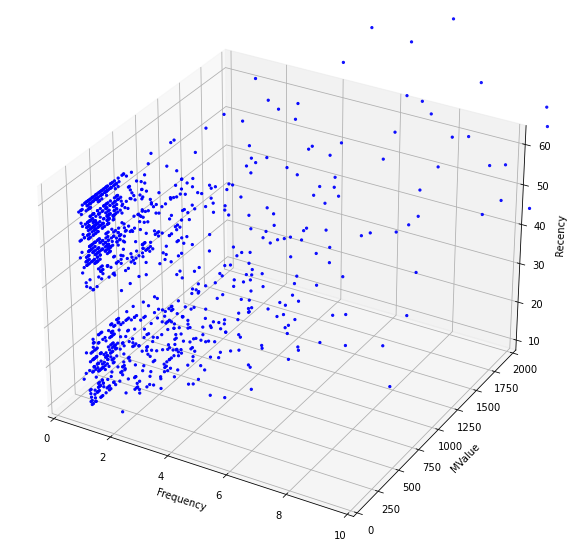

In [0]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rfm_df["Frequency"], rfm_df["MValue"], rfm_df["Recency"], c='blue', s=5)
plt.ylim([0, 2000]) 
plt.xlim([0, 10]) 
#ax.view_init(90, -90)
plt.xlabel("Frequency")
plt.ylabel("MValue")
ax.set_zlabel('Recency')
plt.show()

In [0]:
rfm_df.head(10)

,CustID,Frequency,MValue,Recency
0,13047,3,366.63,61
1,12583,2,1586.02,24
2,13748,1,204.00,61
3,15311,16,6116.70,12
4,16250,1,226.14,61
5,13408,6,3325.32,25
6,13448,3,829.54,52
7,15513,4,2064.82,13
8,17908,1,243.28,61
9,12838,1,390.79,61


In [0]:
len(rfm_df)

Out[181]: 1139

In [0]:
display(rfm_df)

CustID,Frequency,MValue,Recency
13047,3,366.63,61
12583,2,1586.02,24
13748,1,204.0,61
15311,16,6116.7,12
16250,1,226.14,61
13408,6,3325.32,25
13448,3,829.54,52
15513,4,2064.82,13
17908,1,243.28,61
12838,1,390.79,61
